In [1]:
import os
import functools
import operator
import gzip
import struct
import array
import numpy as np
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import os
from random import sample

def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_sample_grid(data, size_x, size_y):
    f, axarr = plt.subplots(size_x,size_y)
    for x in range(size_x):
        for y in range(size_y):
            index = np.random.randint(len(data))
            image = data[index]
            axarr[x,y].imshow(image.reshape(28,28), cmap='gray_r')
    
def fopen(filepath, options = 'rb'):

    DATA_TYPES = {
        0x08: 'B',  # unsigned byte
        0x09: 'b',  # signed byte
        0x0b: 'h',  # short (2 bytes)
        0x0c: 'i',  # int (4 bytes)
        0x0d: 'f',  # float (4 bytes)
        0x0e: 'd'   # double (8 bytes)
    }  

    __fopen = open

    if os.path.splitext(filepath)[1] == '.gz':
        __fopen = gzip.open

    with __fopen(filepath, options) as fd:
        header = fd.read(4)
        zeros, data_type, num_dimensions = struct.unpack('>HBB', header)

        data_type = DATA_TYPES[data_type]

        dimension_sizes = struct.unpack('>' + 'I' * num_dimensions,
                                        fd.read(4 * num_dimensions))
        data = array.array(data_type, fd.read())
        data.byteswap()
        expected_items = functools.reduce(operator.mul, dimension_sizes)

        return np.array(data).reshape(dimension_sizes)

def load_data_set(images_file_path, labels_file_path):
    return fopen(images_file_path), fopen(labels_file_path)

In [2]:
train_x, train_y = load_data_set('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_x,  test_y  = load_data_set('t10k-images-idx3-ubyte.gz',  't10k-labels-idx1-ubyte.gz')

In [3]:
print('Train shape size: x={}, y={}'.format(train_x.shape, train_y.shape))
print('Test shape size:  x={}, y={}'.format(test_x.shape, test_y.shape))

Train shape size: x=(60000, 28, 28), y=(60000,)
Test shape size:  x=(10000, 28, 28), y=(10000,)


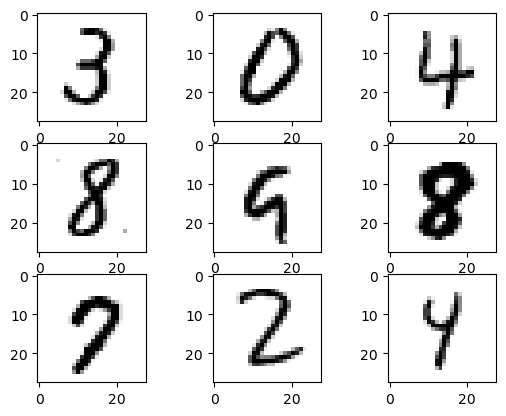

In [4]:
show_sample_grid(train_x, 3, 3)

### Преобразуем данные

In [ ]:
rgb_max_color_value = 255.0

In [5]:
length, width, height = train_x.shape
train_x = train_x.reshape(length, width * height) / rgb_max_color_value

print('Train shape size: x={}, y={}'.format(train_x.shape, train_y.shape))

Train shape size: x=(60000, 784), y=(60000,)


In [6]:
length, width, height = test_x.shape
test_x = test_x.reshape(length, width * height) / rgb_max_color_value
    
print('Test shape size:  x={}, y={}'.format(test_x.shape, test_y.shape))

Test shape size:  x=(10000, 784), y=(10000,)
